In [1]:
import numpy as np
from scipy.linalg import expm, sinm, cosm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from scipy import stats
%matplotlib inline

from IPython.display import Image, display, Math, Latex
sns.set(color_codes=True)

# Quantum Walks

Quantum walks are the quantum variation of the well known random walks heavily computer science in many of its fields, one pretty famous example is the *Page Rank* algorithm, which can be generally seen as a walker on web pages that wants to rank which pages are the most relevant within an specific set of pages. 

Then in constrast to the classical random walk, where the walker occupies definite states and the randomness arises due to stochastic transitions between states, in quantum walks randomness arises through some properties from quantum mechanics like quantum superposition of states, non-random, reversible unitary evolution and collapse of the wave function due to state measurements. It is pretty used in randomized algorithms, and are part of several quantum algorithms, as the Grover's search algorithm, which can be seen as a quantum walk algorithm.

Mathematically we can see the Quantum Walks, or more specifically Continuous-Time Quantum Walks in graphs, like a transition operator from a initial state to a state $t$, which can be seen as $U(t) = U_H(t)$, defined by

$$
    U(t) = e^{-itH}
$$

This formulation comes from a solution to the Schrödinger’s equation, where $t$ defines our time and $H$ describes our Hamiltonian, which in this work will be seen as the graph adjacency matrix $A$ or the graph Laplacian matrix $L$.

## Graph Theory and a Quantum approach on Continuous-Time Random Walks

Now the we understand very superficially what is a quantum walk, lets define some basics for a deeper understanding. Let $G$ be a graph where $G = (V, E)$, where $V(G)$ is the graph's vertex set and $E(G) = \{(u, v)\ \in\ E(G)\ |\ u\ ~\ v\ and\ u,\ v\ \in\ V(G)\}$ is the vertex set, we define the graph's Adjacency $A$ and Laplacian $L$ matrix as it follows:

$$
A_{ij}=\left\{
\begin{array}	
    %1, & \text{(i, j)} \in E\\
    0, & \text{otherwise}
\end{array}\right.
$$

$$
    L_{ij}=\left\{
\begin{array}	
    %-1, & \text{(i, j)} \in E\\
    \mathrm{Deg}(i) & if i = j\\
    0, & \text{otherwise}    
\end{array}\right.
$$

Where L is obtained from the equation $L = D - A$, where $A$ is the adjacency matrix and $D$ the diagonal matrix with the degree of each vertex in the diagonal. 

The Laplacian is used to see the behavior of the classical continuous random walks, which is descriped by a vector $p(t)$ of length $|V(G)|$, where each entrie determines the probability of the walker be on the $i^{th}$ vertex at time $t$, where $p(t)$ is defined as

$$
    \frac{d}{dt}p_i(t) = \sum_{(i, j) \in E} L_{ij}p_j(t)
$$

$$
    p(t) = e^{tL}p(0)
$$

By the Schrödinger equation we've that $i\frac{d}{dt}|\psi\rangle = H|\psi\rangle$, then 

$$
    i\frac{d}{dt}\psi(t) = \sum_{(i, j) \in E} L_{ij}\psi(t)\\
    |\psi(t)\rangle = e^{-iLt}|\psi(0)\rangle 
$$

Which defines our quantum analogue formulation for Continuous-Time Quantum Walks. This lead Graph Theory and Quantum Information Theory to lots of studies on how CTQW works on some deterministic structures such as the line graph, path graph, star graph, cycle graphs, complete graphs etc.

## Continuous-Time Quantum Walks

Finally we can define our continuous-time quantum walk by the unitary operator $U(t)$ on $G_n$ at time $t \geq 0$ as the following

$$
    U_{G_n}(t) = e^{-itL_{G_n}} \equiv \sum_{k = 0}^{\infty}\frac{(it)^k}{k!}L_{G_n}^k
$$

And given a state $|\psi_{G_n, t}\rangle$ is the probability amplitude of each vertice at time $t$ is given by 

$$
    |\psi_{Gn, t}\rangle = U_{G_n}(t)|\psi_{G_n, 0}\rangle
$$

Where the probability that the walker on $G_n$ is in position $x \in V(G)$ at time $t$ with initial state $|\psi_{G_n, 0}$ is

$$
    \mathcal{P}(x) = \big|U_{G_n}(t)|\psi_{G_n, 0}\rangle(x)\big|^2 
$$

## Example

Now let's see an example of how it work on cycle graph $C_n$ for some numbers of vertices.

In [2]:
#number of vertices
n = 1000

#Define adjacency matrix A_Cn
A = np.zeros((n, n))
for i in range(n):
    j1 = (i - 1)%n
    j2 = (i + 1)%n
    A[i][j1] = 1
    A[i][j2] = 1
        

#Define degree matrix D
#Each vertex i \in V(G)
#will have degree(i) = 2
D = 2*np.eye(n)

#Define the Laplacian L
#that will be our hamiltonian
L = D - A

#Define our initial state Psi_0
#with probability 1 that it will
#at the vertex y = ?
y = math.floor(n/2)
psi_0 = np.zeros(n)
psi_0[y] = 1

#Define the time t >= 0
t = 500

#Exponentiate or hamiltonian
H = expm(-(1j)*t*L)

#Compute Psi_t
psi_t = H @ psi_0

#Compute the probabilities
p_t = np.copy(psi_t)
p_t = abs(p_t)**2

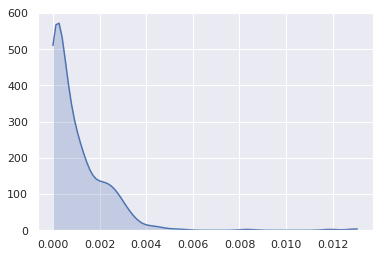

In [3]:
sns.kdeplot(p_t, shade=True, cut=0)

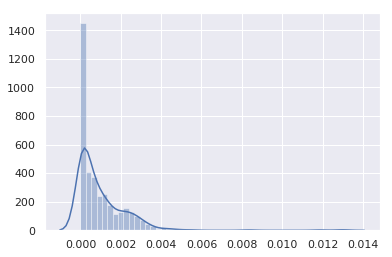

In [4]:
sns.distplot(p_t)

Then we can easily visualize how our quantum-walker behaves on graph $C_n$ given an initial state and a period of time t.